# TestFacesNorm - Trying to normalise face images so are in 100 * 100 matrix, fully occupying that space and grey background removed

Terry Snow 14/1/17

In [3]:
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [4]:
%pwd

'/Users/terrysnow/Big Data'

(0,)
<class 'numpy.ndarray'>


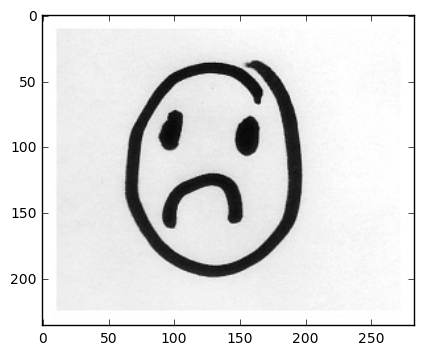

In [95]:
import glob
imfiles = glob.glob("data\\faces\\*.jpeg")
print(np.shape(imfiles))

#path = "data/faces/scan001S.jpeg"
#path = "data/faces/scan094N.jpeg"
#path = "data/faces/scan020N.jpeg"
path = "data/faces/scan044N.jpeg"
#path = "data/faces/scan088N.jpeg"
face = mpimg.imread(path,format='jpeg')
print(type(face))
plt.imshow(face,cmap=plt.get_cmap("gray"))

In [96]:
type(face), np.ndim(face), np.shape(face)

(numpy.ndarray, 2, (236, 283))

# Looking for algo to find the extent of the face max/min rol / col

In [97]:
#pure white is a value of 255, threshold for black is any number less than 40
#can see this by inspecting a row of the image.
face[100,30:60]

array([237, 238, 238, 238, 238, 238, 238, 238, 239, 239, 239, 239, 239,
       239, 238, 238, 237, 237, 240, 239, 238, 238, 238, 238, 238, 238,
       236, 237, 238, 238], dtype=uint8)

In [103]:
itemindex = np.where(face < 40)
print(itemindex)

(array([ 37,  37,  37,  37,  37,  37,  37,  37,  37,  37,  37,  37,  38,
        38,  38,  38,  38,  38,  39,  39,  39,  39,  39,  40,  40,  40,
        40,  40,  40,  40,  41,  41,  41,  41,  41,  41,  41,  41,  41,
        42,  42,  42,  42,  42,  42,  42,  42,  42,  42,  42,  43,  43,
        43,  43,  43,  43,  43,  43,  44,  44,  44,  44,  44,  44,  44,
        44,  44,  44,  44,  44,  45,  45,  45,  45,  45,  45,  45,  45,
        45,  45,  45,  46,  46,  46,  46,  46,  46,  46,  46,  46,  46,
        46,  47,  47,  47,  47,  48,  48,  48,  48,  48,  48,  48,  49,
        49,  49,  49,  49,  49,  50,  50,  50,  50,  50,  50,  51,  51,
        51,  51,  51,  51,  52,  52,  52,  52,  52,  52,  52,  53,  54,
        54,  54,  54,  54,  54,  54,  54,  55,  55,  56,  56,  56,  56,
        57,  57,  57,  57,  57,  58,  58,  58,  58,  58,  59,  59,  59,
        60,  60,  60,  61,  61,  61,  61,  61,  63,  63,  63,  64,  65,
        65,  65,  66,  66,  66,  67,  68,  70,  71,  73,  74,  

In [104]:
rowvals, colvals = itemindex

In [105]:
minrow, maxrow, mincol, maxcol = rowvals[0], rowvals[-1], min(colvals), max(colvals)
minrow, maxrow, mincol, maxcol

(37, 193, 73, 195)

In [106]:
facenorm = face[minrow:maxrow, mincol:maxcol]
np.shape(facenorm)

(156, 122)

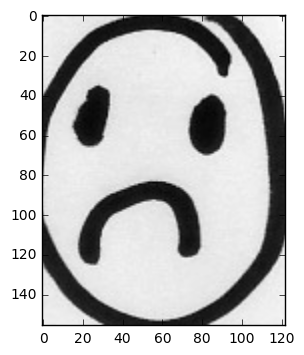

In [107]:
plt.imshow(facenorm,cmap=plt.get_cmap("gray"))

# Now what to resize , to say 30 by 30

In [112]:
NEWSIZE_ROW = 30
NEWSIZE_COL = 30
ROW_ORIG_SIZE,COL_ORIG_SIZE = np.shape(facenorm)
facenorm1 = np.zeros((NEWSIZE_ROW,NEWSIZE_COL),dtype=np.uint8)

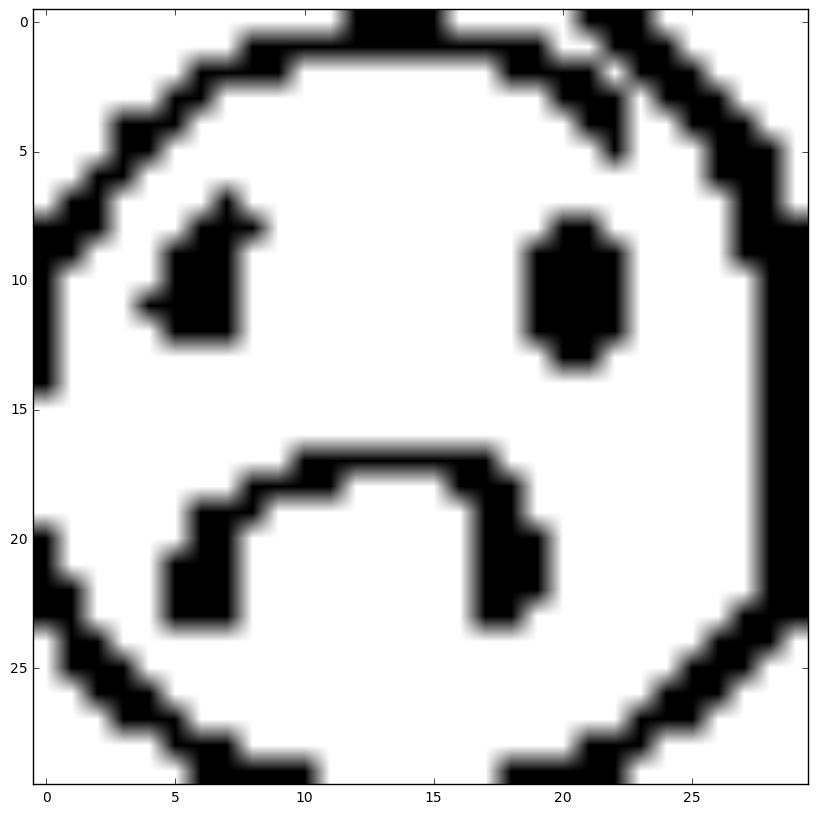

In [121]:
rBase, cBase = np.shape(facenorm)
for r in range(0,NEWSIZE_ROW):
    for c in range(0,NEWSIZE_COL):
        facenorm1[r,c] = 0 if facenorm[round((r * ROW_ORIG_SIZE)/NEWSIZE_ROW), 
                                  round((c * COL_ORIG_SIZE)/NEWSIZE_COL)] < 100 else 255
        
plt.figure(figsize=(10,10))
plt.imshow(facenorm1,cmap=plt.get_cmap("gray"))

In [114]:
type(facenorm1[0,0])

numpy.uint8